***Импорт библиотек и загрузка данных***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv"

In [3]:
df = pd.read_csv(DATASET)

# Описание данных

# Abalone

* Predict the age of abalone from physical measurements*

* Sex - nominal - M, F, and I (infant)*

* Length - continuous - mm - Longest shell measurement*

* Diameter - continuous - mm - perpendicular to length*

* Height - continuous - mm - with meat in shell*

* Whole weight - continuous - grams - whole abalone*

* Shucked weight - continuous - grams - weight of meat*

* Viscera weight - continuous - grams - gut weight (after bleeding)*

* Shell weight - continuous - grams - after being dried*

* Rings - integer - +1.5 gives the age in years (target)*

In [4]:
dtale.show(df)

***Исследование данных***

*Размер датасета*

In [5]:
df.shape

(4177, 9)

*Информация о типах данных и пропусках*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


*Число пропусков в столбцах*

In [7]:
missing_values = df.isnull().sum()
print(missing_values)

Sex                0
Length             0
Diameter          99
Height             0
Whole weight      99
Shucked weight     0
Viscera weight     0
Shell weight      50
Rings              0
dtype: int64


In [8]:
# Diameter

In [9]:
# Если в данных есть пропуски в 'Diameter', подставляем вместо них медиану
median_Diameter = df['Diameter'].median()

In [10]:
# ну или так можно...
df.loc[df['Diameter'].isnull(), 'Diameter'] = median_Diameter

In [11]:
# Whole weight

In [12]:
# Если в данных есть пропуски в 'Whole weight', подставляем вместо них медиану
median_Whole_weight = df['Whole weight'].median()

In [13]:
# ну или так можно...
df.loc[df['Whole weight'].isnull(), 'Whole weight'] = median_Whole_weight

In [14]:
# Shell weight

In [15]:
# Если в данных есть пропуски в 'Shell weight', подставляем вместо них медиану
median_Shell_weight = df['Shell weight'].median()

In [16]:
# ну или так можно...
df.loc[df['Shell weight'].isnull(), 'Shell weight'] = median_Shell_weight

In [17]:
df.isnull().mean() * 100 # убедимся, что нет больше пропущенных значений

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [18]:
df.isnull().sum().sum() # всего пропусков

0

## Наивный байесовский классификатор

In [19]:
X = df[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']] # возьмем все числовые признаки
y = df[['Rings']] # целевая переменная

In [20]:
y.value_counts() # целевая переменная

Rings
9        689
10       634
8        568
11       487
7        391
12       267
6        259
13       203
14       126
5        115
15       103
16        67
17        58
4         57
18        42
19        32
20        26
3         15
21        14
23         9
22         6
27         2
24         2
26         1
1          1
25         1
2          1
29         1
Name: count, dtype: int64

* показывает несбалансированность 

<Axes: xlabel='Rings', ylabel='Count'>

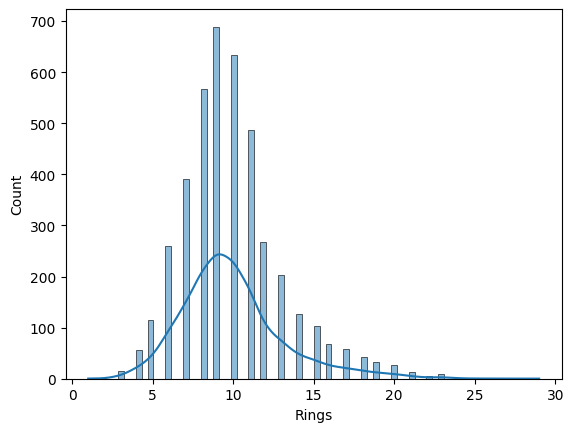

In [21]:
sns.histplot(data=df['Rings'], kde=True)

Распределение целевой переменной не имеет тяжелого хвоста

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.23827751196172248

* accuracy_score не хороший

In [24]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

# Вывод отчета
print(report)

              precision    recall  f1-score   support

           3       0.15      0.67      0.25         3
           4       0.26      0.50      0.34        16
           5       0.17      0.28      0.21        39
           6       0.17      0.27      0.21        60
           7       0.26      0.31      0.28       111
           8       0.24      0.28      0.26       127
           9       0.27      0.37      0.31       178
          10       0.24      0.13      0.17       165
          11       0.26      0.47      0.34       116
          12       0.25      0.02      0.03        66
          13       0.00      0.00      0.00        45
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00        12
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00         7
          20       0.00    

## KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_cl = KNeighborsClassifier()

knn_cl.fit(X_train, y_train)

pred_knn = knn_cl.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.23827751196172248

* accuracy_score не хороший

In [27]:
report = classification_report(y_test, y_pred)

# Вывод отчета
print(report)

              precision    recall  f1-score   support

           3       0.15      0.67      0.25         3
           4       0.26      0.50      0.34        16
           5       0.17      0.28      0.21        39
           6       0.17      0.27      0.21        60
           7       0.26      0.31      0.28       111
           8       0.24      0.28      0.26       127
           9       0.27      0.37      0.31       178
          10       0.24      0.13      0.17       165
          11       0.26      0.47      0.34       116
          12       0.25      0.02      0.03        66
          13       0.00      0.00      0.00        45
          14       0.00      0.00      0.00        32
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0.00        16
          17       0.00      0.00      0.00        12
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00         7
          20       0.00    

In [28]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_cl, X, y, scoring='accuracy', cv=3, n_jobs=-1).mean()

0.2260053345545461

Предупреждение, которое получили, указывает на то, что одна из классов меток в вашем целевом массиве y содержит слишком мало экземпляров для выполнения кросс-валидации с числом фолдов (cv) больше, чем количество экземпляров в этом классе. В данном случае, в одном из классов всего 1 экземпляр, что меньше, чем количество фолдов, заданное в cv=3.

* Подберем гиперпараметры в ручную. Для этого нам необходимо разбить данные на три части: train, validation, test

In [29]:
# Дополнительное разделение обучающей выборки на обучающую и валидационную
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [30]:
best_k = -1
best_acc = -1

for k in np.arange(2, 30, 1):
    knn_cl = KNeighborsClassifier(n_neighbors=k)

    knn_cl.fit(X_train, y_train)
    pred_knn_cl = knn_cl.predict(X_val)
    acc = accuracy_score(y_val, pred_knn_cl)

    if acc > best_acc:  # Нам нужно минимальное значение
        best_k = k
        best_acc = acc

    print('n_neighbors:', k, 'accuracy:', acc)

print(f' best_k = {best_k}, best_acc = {best_acc}')

n_neighbors: 2 accuracy: 0.21966794380587484
n_neighbors: 3 accuracy: 0.2260536398467433
n_neighbors: 4 accuracy: 0.21711366538952745
n_neighbors: 5 accuracy: 0.20689655172413793
n_neighbors: 6 accuracy: 0.20945083014048532
n_neighbors: 7 accuracy: 0.22094508301404853
n_neighbors: 8 accuracy: 0.22988505747126436
n_neighbors: 9 accuracy: 0.2260536398467433
n_neighbors: 10 accuracy: 0.23371647509578544
n_neighbors: 11 accuracy: 0.2247765006385696
n_neighbors: 12 accuracy: 0.2222222222222222
n_neighbors: 13 accuracy: 0.22349936143039592
n_neighbors: 14 accuracy: 0.22349936143039592
n_neighbors: 15 accuracy: 0.23754789272030652
n_neighbors: 16 accuracy: 0.24393358876117496
n_neighbors: 17 accuracy: 0.24776500638569604
n_neighbors: 18 accuracy: 0.24521072796934865
n_neighbors: 19 accuracy: 0.2413793103448276
n_neighbors: 20 accuracy: 0.2413793103448276
n_neighbors: 21 accuracy: 0.2388250319284802
n_neighbors: 22 accuracy: 0.23499361430395913
n_neighbors: 23 accuracy: 0.2388250319284802
n_ne

*  подбор гиперпараметров по сетке с помощью GridSearchCV:

In [31]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 24, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV (model, params, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 44 candidates, totalling 132 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [32]:
gs.best_score_, gs.best_params_

(0.2547892720306513, {'n_neighbors': 18, 'p': 1, 'weights': 'uniform'})

GridSearchCV надежнее в вычислении наилучших гиперпараматеров, поэтому будем использовать его значения для дальнейшего прогноза.

In [33]:
pred = gs.best_estimator_.predict(X_test)

accuracy_score(y_test, pred)

0.26889952153110047

In [34]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [35]:
X_full = df.drop('Rings', axis=1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.25, random_state=42)

In [36]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical = ['Sex']
numeric_features = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = ct.fit_transform(X_train_full)
X_test_transformed = ct.transform(X_test_full)

In [37]:
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric_features)

new_features

['Sex_F',
 'Sex_I',
 'Sex_M',
 'Sex_f',
 'Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [38]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

X_train_transformed.head()

,Sex_F,Sex_I,Sex_M,Sex_f,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.0,0.0,0.0,0.0,0.729730,0.672269,0.119469,0.374358,0.317754,0.345622,0.271550
1,1.0,0.0,0.0,0.0,0.594595,0.571429,0.123894,0.242253,0.188299,0.164582,0.217738
2,0.0,0.0,1.0,0.0,0.790541,0.798319,0.154867,0.559943,0.496638,0.460829,0.402093
3,0.0,0.0,1.0,0.0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
4,0.0,0.0,1.0,0.0,0.567568,0.579832,0.137168,0.285638,0.157028,0.151415,0.347285


In [39]:
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 20, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs = GridSearchCV(
    estimator=model,
    param_grid=params,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,      # Использовать все доступные ядра
    verbose=2       # Показать процесс обучения
)

gs.fit(X_train_transformed, y_train_full)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [40]:
print("Лучшие параметры:", gs.best_params_)
print("Лучшая accuracy:", gs.best_score_)

Лучшие параметры: {'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}
Лучшая accuracy: 0.2512771392081737


In [41]:
pred = gs.best_estimator_.predict(X_test_transformed)

accuracy_score(y_test_full, pred)

0.25645933014354066

Добавление категориального признака почти не изменило качество модели, поэтому мы можем сделать вывод, что Sex особо не влияет на целевую переменную.

### Dashboard

In [42]:
!pip install explainerdashboard -q

In [43]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [44]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [45]:
explainer = ClassifierExplainer(gs.best_estimator_, 
                                 X_test_transformed.iloc[:10], 
                                 y_test_full.iloc[:10]) 

Note: shap values for shap='kernel' normally get calculated against X_background, but paramater X_background=None, so setting X_background=shap.sample(X, 50)...
Generating self.shap_explainer = shap.KernelExplainer(model, X, link='identity')


In [46]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/10 [00:00<?, ?it/s]

2025-07-05 18:28:50,141 - INFO     - num_full_subsets = 5
2025-07-05 18:28:50,330 - INFO     - np.sum(w_aug) = 9.999999999999998
2025-07-05 18:28:50,331 - INFO     - np.sum(self.kernelWeights) = 0.9999999999999999
2025-07-05 18:28:50,333 - INFO     - np.sum(w_aug) = 9.999999999999998
2025-07-05 18:28:50,333 - INFO     - np.sum(self.kernelWeights) = 0.9999999999999999
2025-07-05 18:28:50,335 - INFO     - np.sum(w_aug) = 9.999999999999998
2025-07-05 18:28:50,335 - INFO     - np.sum(self.kernelWeights) = 0.9999999999999999
2025-07-05 18:28:50,336 - INFO     - np.sum(w_aug) = 9.999999999999998
2025-07-05 18:28:50,337 - INFO     - np.sum(self.kernelWeights) = 0.9999999999999999
2025-07-05 18:28:50,342 - INFO     - phi = array([ 0.00000000e+00, -2.03373016e-04, -1.06646825e-04, -3.59623016e-04,
        1.79811508e-03, -6.20039683e-05, -3.22420635e-04, -2.40575397e-04,
       -2.40575397e-04, -2.62896825e-04])
2025-07-05 18:28:50,343 - INFO     - np.sum(w_aug) = 9.999999999999998
2025-07-05 1

Calculating prediction probabilities...
Calculating metrics...


C:\Users\yam67\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
C:\Users\yam67\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
C:\Users\yam67\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
C:\Users\yam67\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.


ValueError: y_true contains only one label (0). Please provide the true labels explicitly through the labels argument.

In [ ]:
db.run()